# SI toy model

***

In [27]:
import requests
import random
import networkx as nx
import matplotlib.pyplot as plt

***

## Exercise 20.1 from SNA

Implement an SI model on the network at `http://www.networkatlas.eu/exercises/20/1/data.txt`. Run it 10 times with different β values: 0.05, 0.1, and 0.2. For each run (in this and all following questions) pick a random node and place it in the Infected state. What’s the average time step in which each of those β infects 80% of the network?

In [18]:
# define parameters
betas = [0.05, 0.1, 0.2]
threshold = 80

# get network data (edgelist)
url = "https://www.networkatlas.eu/exercises/20/1/data.txt"
data = requests.get(url).text
data = data.split("\n")
data = data[:-1]
edgelist = [[int(x) for x in edge.split("\t")] for edge in data]
edgelist

[[0, 2140],
 [1, 2453],
 [2, 2169],
 [3, 2250],
 [4, 2108],
 [5, 2456],
 [6, 2498],
 [7, 2354],
 [8, 2501],
 [9, 2210],
 [10, 2502],
 [11, 2367],
 [12, 2471],
 [13, 1619],
 [14, 2087],
 [15, 2492],
 [16, 2415],
 [17, 1963],
 [19, 2503],
 [20, 2489],
 [21, 2503],
 [22, 2503],
 [23, 2247],
 [24, 2479],
 [25, 2503],
 [27, 2052],
 [28, 2502],
 [29, 2454],
 [31, 2503],
 [32, 1828],
 [34, 2427],
 [35, 1305],
 [36, 2201],
 [37, 1990],
 [38, 2447],
 [39, 2472],
 [40, 2493],
 [41, 2496],
 [42, 2503],
 [43, 1298],
 [45, 2485],
 [47, 2501],
 [48, 2426],
 [49, 2501],
 [50, 2503],
 [51, 2358],
 [52, 2503],
 [54, 2494],
 [55, 2501],
 [56, 2502],
 [59, 2382],
 [61, 2265],
 [62, 2503],
 [63, 2503],
 [64, 1868],
 [65, 2408],
 [66, 2503],
 [67, 2464],
 [68, 2086],
 [69, 2503],
 [71, 2256],
 [74, 2503],
 [75, 1569],
 [76, 2303],
 [77, 2433],
 [78, 1660],
 [79, 2501],
 [80, 2503],
 [82, 2502],
 [83, 2501],
 [84, 2502],
 [85, 2501],
 [86, 2503],
 [87, 2503],
 [88, 2501],
 [89, 2503],
 [90, 2452],
 [91, 164

In [19]:
## implement with networkx
G_orig = nx.Graph()
G_orig.add_edges_from(edgelist)
nx.set_node_attributes(G_orig, 0, "status")


In [32]:
# plant a random seed
random.seed(1312)

# for each beta value,
# for beta in betas:
beta = betas[0]

# do 10 model runs,
# for _ in range(10):
# randomly picking one node
patient_zero = random.choice(list(G_orig.nodes))

G = G_orig.copy()

G.nodes[patient_zero]["status"] = 1


#n for n in nx.neighbors(G, patient_zero)


In [33]:
# %%timeit
# for i in range(10):
#     nx.get_node_attributes(G, "status")

In [42]:
## implement "manually"
random.seed(1312)

beta = 0.001

maxtime = 100

d = {}

for edge in edgelist:
    for node in edge:
        if not node in d:
            d[node] = []
    d[edge[0]].append(edge[1])
    d[edge[1]].append(edge[0])


runs = {}

for run in range(10):

    time = 0
    infected = []

    patient_zero = random.choice(list(d.keys()))
    infected.append(patient_zero)
    infected_ratio = [1/len(G_orig.nodes)]
    neighbours = d[patient_zero].copy()
    time += 1

    # at each timestep,
    while time < maxtime:
        # assume that each edge represents a *contact*
        # for each edge that contains an infected node,
        # infect the other node with probability beta:
        for i in infected:
            neighbours += d[i].copy()
        #print(f"neighbours at time step {time}: ", neighbours)
        for neighbour in neighbours:
            if random.uniform(0,1) < beta:
                infected.append(neighbour)
        infected_percent = 100 * round(len(set(infected)) / len(G_orig), 2)
        infected_ratio.append(infected_percent)
        #print(f"infected: {infected_percent}")

        time +=1
        if infected_percent > threshold:
            break
    runs[run] = infected_ratio.copy()

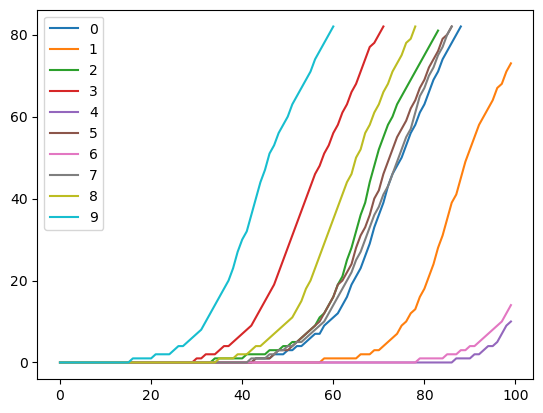

In [43]:
fig, ax = plt.subplots(1,1)
for k, v in runs.items():
    ax.plot(v, label = k)
ax.legend()
plt.show()

In [39]:
for node in G.nodes:
    assert sorted(d[node]) == sorted(list(nx.neighbors(G, node)))